## Plotting Data from the Internet

The National Institute on Drug Abuse recently released a [report](https://www.drugabuse.gov/related-topics/trends-statistics/overdose-death-rates) on overdose death rates. This report has a graph that shows the overdose death rate for opioids from 1999 to 2015. Let's see if we can reproduce this graph.

<img src="https://d14rmgtrwzf5a.cloudfront.net/sites/default/files/cdcwonder2016_2.jpg",width=300>

### Loading the data
The report has a link an Excel workbook that contains the data we require. We will retrieve the sheet named ``Online``. We skip the first 6 and last 14 rows.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls'
df = pd.read_excel(url, sheetname='Online', skiprows=6, skip_footer=14)
df

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849,17415,19394,23518,25785,27424,29813,34425,36010,36450,37004,38329,41340,41502,43982,47055,52404
1,NaN,Female,5591,5852,6736,8490,9386,10304,11089,12532,13712,13982,14411,15323,16352,16390,17183,18243,19447
2,NaN,Male,11258,11563,12658,15028,16399,17120,18724,21893,22298,22468,22593,23006,24988,25112,26799,28812,32957
3,NaN,Prescription Drugs1,7523,7885,9197,11529,12640,14153,15352,18559,19601,20044,20848,22134,22810,22114,22767,25760,29728
4,NaN,Female,3011,3196,3790,4765,5191,5980,6351,7553,8251,8275,8740,9292,9771,9632,10019,11181,12218
5,NaN,Male,4512,4689,5407,6764,7449,8173,9001,11006,11350,11769,12108,12842,13039,12482,12748,14579,17510
6,NaN,Opioid Pain Relievers2,4030,4400,5528,7456,8517,9857,10928,13723,14408,14800,15597,16651,16917,16007,16235,18893,22598
7,NaN,Female,1287,1534,1969,2761,3173,3758,4188,5058,5630,5733,6213,6631,6903,6745,6992,7924,8786
8,NaN,Male,2743,2866,3559,4695,5344,6099,6740,8665,8778,9067,9384,10020,10014,9262,9243,10969,13812
9,NaN,Benzodiazepines3,1135,1298,1594,2022,2248,2627,3084,3835,4500,5010,5567,6497,6872,6524,6973,7945,8791


### Subsetting the data

The opioid death data is in rows 21-23. We can ignore the first two columns.

In [2]:
opioids = df.iloc[21:24, 2:]
opioids.index = ['Total', 'Female', 'Male']
opioids

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total,8048,8407,9492,11917,12939,13755,14917,17545,18515,19582,20422,21088,22784,23164,25050,28647,33091
Female,2057,2264,2766,3759,4137,4642,5161,5945,6581,6819,7287,7733,8325,8431,9054,10227,11420
Male,5991,6143,6726,8158,8802,9113,9756,11600,11934,12763,13135,13355,14459,14733,15996,18420,21671


We need to transpose the dataframe, i.e. swap the rows and the columns.

In [3]:
opioids = opioids.T
opioids

,Total,Female,Male
1999,8048,2057,5991
2000,8407,2264,6143
2001,9492,2766,6726
2002,11917,3759,8158
2003,12939,4137,8802
2004,13755,4642,9113
2005,14917,5161,9756
2006,17545,5945,11600
2007,18515,6581,11934
2008,19582,6819,12763


### Line graph
Now we can use the ``DataFrame.plot`` method to create a simple line graph.

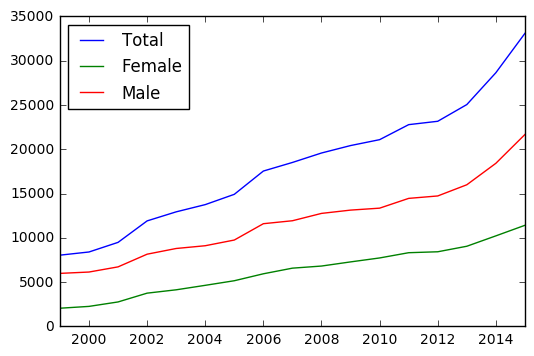

In [4]:
opioids.plot()

### Stacked bar chart

We can also plot the data using a stacked bar chart.

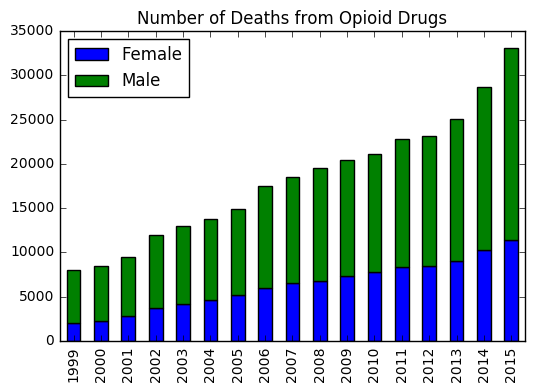

In [5]:
opioids[['Female', 'Male']].plot(kind='bar', stacked=True, title='Number of Deaths from Opioid Drugs')

### Combining lines and bars in a single plot

The original chart had both lines and bars. I don't know how to achieve this using the ``DataFrame.plot`` method, but it can be done using ``pyplot``.

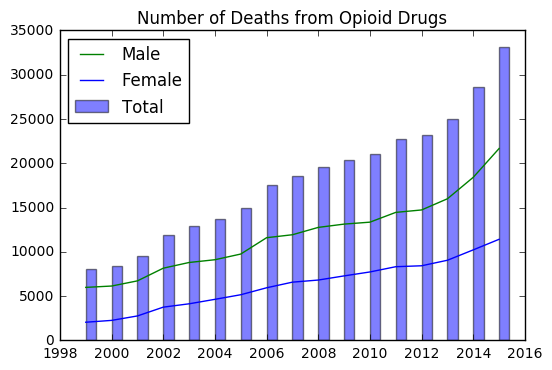

In [6]:
plt.bar(opioids.index, opioids['Total'], width=0.4, alpha=0.5, label='Total')
plt.plot(opioids.index, opioids['Male'], label='Male', color='green')
plt.plot(opioids.index, opioids['Female'], label='Female', color='blue')
plt.title('Number of Deaths from Opioid Drugs')
plt.legend(loc='upper left')

### Exercise

Create some interesting graphs using this data.